## Variables à ajouter issues des recherches biblio

Variable(s): 

- Population des pays représentés 
- Variable indiquant si le pays est communiste ou pas 
- Variable indiquant si le pays est stable ou pas 
- Variable indiquant si le pays est émergeant ou pas ( otherwise pauvre , riche à peaufiner par la suite) 
- Variable indiquant si le pays a la culture du sport ou pas. 
- Variable indiquant le PIB par habitant 
- Variable indiquant les financements alloués aux sports (olympiques ou pas)


Il faut créer le train et le test avec des données 2024 , il faut les construire , il faut aussi savoir traiter le fait que cette fois ci la Russie ne sera pas disponible .
Faire indice : pays perturbé 1 avec Russie par exemple ou bien on enlève la Russie  (contexte géopolitique simple, on tah les années où j'ai eu un pb )

But c'est de prédire le nombre de médailles pour chaque pays , indicateur simple 

In [31]:
# !pip install ydata_profiling

In [31] used -0.1 MiB RAM in 0.10s (system mean cpu 6%, single max cpu 40%), peaked 0.0 MiB above final usage, current RAM usage now 311.3 MiB


In [57]:
import pandas as pd
import numpy as np
import ipython_memory_usage.ipython_memory_usage as imu
from describe_csv import *  # charge le fichier describe_csv.py par chunk de 10 000 (10**4)
from ydata_profiling import ProfileReport
import math
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy as sp
import scipy.stats
from pivottablejs import pivot_ui
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline, make_union
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

imu.start_watching_memory()



In [57] used -0.2 MiB RAM in 0.11s (system mean cpu 2%, single max cpu 6%), peaked 0.0 MiB above final usage, current RAM usage now 418.8 MiB


# Introduction  (Business Understanding) 

## Détermination objectifs métier , analytique du projet 


Objectifs métiers du projet :

Promotion de la performance sportive : Utiliser les données des Jeux olympiques pour améliorer la performance sportive.

Optimisation des ressources : Identifier les sports les plus prometteurs pour optimiser les investissements sportifs.

Prédiction des tendances : Prédire les performances futures des pays et des athlètes en se basant sur les données historiques.

Analyse de la participation : Analyser la participation mondiale aux Jeux olympiques pour identifier les opportunités de croissance.

-------
Objectifs analytiques du projet :

Analyse des performances : Évaluer les performances des pays, des équipes et des athlètes aux Jeux olympiques.

Identification des facteurs de réussite : Identifier les clés du succès dans différents sports et disciplines.

Visualisation des données : Créer des visualisations interactives pour présenter les tendances et les comparaisons de manière compréhensible.

Modélisation prédictive : Développer des modèles prédictifs pour estimer les performances futures.

## Identifier les contraintes , limites et risque du projet

Qualité des données : Les données historiques peuvent être incomplètes ou imprécises.

Variabilité des performances : Les performances sportives sont influencées par de nombreux facteurs difficiles à quantifier.

Interprétation des résultats : Les résultats doivent être interprétés avec prudence en raison de la subjectivité des performances sportives.

Protection des données : Respecter les règles de confidentialité et de protection des données lors de l'analyse des données.

Dépendance aux technologies : Le projet dépend de technologies telles que l'analyse de données, la modélisation statistique, etc.

# 2. Data understanding (compréhension des données)


## 2.1.  Chargement des données

### Chargement des différentes bases de données + étude du chargement en mémoire

In [3]:
df = pd.read_csv("data/athlete_events.csv")
df = df[(df['Year'] > 2000) & (df['Season'] == 'Summer')]

region_df = pd.read_csv("data/noc_regions.csv")
dictionary = pd.read_csv("data/dictionary.csv")

In [3] used 20.8 MiB RAM in 0.62s (system mean cpu 8%, single max cpu 67%), peaked 43.4 MiB above final usage, current RAM usage now 282.4 MiB


In [4]:
# méthode pour calculer la taille réelle occupée par le dataframe : les index occupent aussi de la place en mémoire
df.memory_usage(index=True).sum()

7863240

In [4] used 0.1 MiB RAM in 0.11s (system mean cpu 12%, single max cpu 71%), peaked 0.0 MiB above final usage, current RAM usage now 282.5 MiB


32534052 octets = 32,53 MB =  32534,052 KB.

## 2.2 Décrire les données

### Charger les données avec describe_csv et indiquer les types optimaux pour chaque colonne. 

In [5]:
describe_csv("data/athlete_events.csv", delimiter=',')

0 M rows approx.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
---------------------------------------------------
data/athlete_events.csv
---------------------------------------------------
       Col     type   min    max  nulls optimal type
0     Name   object     -      -      -       object
1      Sex   object     -      -      -       object
2      Age  float64  10.0   97.0   9633         int8
3   Height  float64  0.01  226.0  67360      float16
4   Weight  float64  25.0  214.0  74749        int16
5     Team   object     -      -      -       object
6      NOC   object     -      -      -       object
7    Games   object     -      -      -       object
8     Year    int64  1896   2020      0        int16
9   Season   object     -      -      -       object
10    City   object     -      -      -       object
11   Sport   object     -      -      -       object
12   Event   object     -      -      -       object
13   Medal   object     -      -  

In [6]:
describe_csv("data/noc_regions.csv", delimiter=',')
describe_csv("data/dictionary.csv", delimiter=',')

0 M rows approx.
1 
---------------------------------------------------
data/noc_regions.csv
---------------------------------------------------
      Col    type min max nulls optimal type
0     NOC  object   -   -     -       object
1  region  object   -   -     -       object
2   notes  object   -   -     -       object

 0  rows
0 M rows approx.
1 
---------------------------------------------------
data/dictionary.csv
---------------------------------------------------
              Col     type         min            max nulls optimal type
0         Country   object           -              -     -       object
1            Code   object           -              -     -       object
2      Population  float64     10222.0   1371220000.0     5        int32
3  GDP per Capita  float64  277.068309  101449.968168    25      float32

 201  rows
In [6] used 0.0 MiB RAM in 0.12s (system mean cpu 7%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 284.8 MiB


In [7]:
print(df.isnull().sum())

Name          0
Sex         159
Age         161
Height     7720
Weight    12653
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport       159
Event      9492
Medal     55132
dtype: int64
In [7] used 0.0 MiB RAM in 0.12s (system mean cpu 6%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 284.8 MiB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,65366.0,26.146315,5.622341,12.00,22.0,25.0,29.0,71.0
Height,57807.0,161.991482,48.829024,0.01,165.0,175.0,183.0,226.0
Weight,52874.0,71.245300,15.868189,28.00,60.0,69.5,80.0,214.0
Year,65527.0,2011.813695,5.599671,2004.00,2008.0,2012.0,2016.0,2020.0


In [8] used 0.1 MiB RAM in 0.13s (system mean cpu 2%, single max cpu 80%), peaked 0.0 MiB above final usage, current RAM usage now 284.9 MiB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65527 entries, 1 to 282989
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    65527 non-null  object 
 1   Sex     65368 non-null  object 
 2   Age     65366 non-null  float64
 3   Height  57807 non-null  float64
 4   Weight  52874 non-null  float64
 5   Team    65527 non-null  object 
 6   NOC     65527 non-null  object 
 7   Games   65527 non-null  object 
 8   Year    65527 non-null  int64  
 9   Season  65527 non-null  object 
 10  City    65527 non-null  object 
 11  Sport   65368 non-null  object 
 12  Event   56035 non-null  object 
 13  Medal   10395 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 7.5+ MB
In [9] used 0.1 MiB RAM in 0.12s (system mean cpu 4%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 285.1 MiB


In [10]:
# Find the unique values in year column.
df.Games.unique()

array(['2012 Summer', '2008 Summer', '2016 Summer', '2004 Summer',
       'Tokyo 2020'], dtype=object)

In [10] used 0.0 MiB RAM in 0.11s (system mean cpu 4%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 285.1 MiB


### Utilisation pandas_profiling

In [11]:
# profile = ProfileReport(df, title='Pandas Profiling Report')
# profile.to_file("report-profiling-test.html")

In [11] used 0.0 MiB RAM in 0.10s (system mean cpu 8%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 285.1 MiB


### EDA via pivottablejs

In [12]:
# pivot_ui(df)

In [12] used 0.0 MiB RAM in 0.10s (system mean cpu 6%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 285.1 MiB


## EDA

### Target =  Medals : Nous allons construire des représentations graphiques nous permettant d'observer les Medals en fonction des autres variables.On effectue des transformations sur les données pour les besoins de cette analyse exploratoire (pas forcément les mêmes transformations que celles nécessaires lors de l'étape de Feature engineering).

In [13]:
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2016)]
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
79,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
80,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
82,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN
98,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN


In [13] used -1.2 MiB RAM in 0.12s (system mean cpu 4%, single max cpu 100%), peaked 1.2 MiB above final usage, current RAM usage now 283.9 MiB


In [14]:
# # TRAITER AGE NULL (moyenne des ages)
# df['Age'] = df['Age'].fillna(df['Age'].mean())

# df['Height'] = df['Height'].fillna(df.groupby('Sex')['Height'].transform('mean'))
# df['Weight'] = df['Weight'].fillna(df.groupby('Sex')['Weight'].transform('mean'))

# # TRAITER SEASON NULL (0 si null, 1 sinon)
# df['Season'] = np.where(df['Season'].isnull(), 0, 1)

# # TRAITER AGE GROUP
# df['AgeGroup'] = pd.cut(df.Age, bins=range(0, 81, 10), right=True,
#                         labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# # TRAITER WEIGHT GROUP
# df['WeightGroup'] = pd.cut(df.Weight, bins=range(0, 215, 20), right=True,
#                            labels=['30-49', '50-69', '70-89', '90-109', '110-129', '130-149', '150-169', '170-189', '190-209', '210-229'])

# # TRAITER HEIGHT GROUP
# df['HeightGroup'] = pd.cut(df.Height, bins=range(100, 227, 20), right=True,
#                            labels=['100-119', '120-139', '140-159', '160-179', '180-199', '200-219'])

# # On regroupe les données : par medals/no-medals
# survivors = df[df.Medal == True]  # 1
# non_survivors = df[df.Medal == True]  # 0



In [14] used 0.0 MiB RAM in 0.10s (system mean cpu 9%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 283.9 MiB


In [15]:
# TRAITER AGE NULL (moyenne des ages)
df['Age'] = df['Age'].fillna(df['Age'].mean())

# TRAITER HEIGHT NULL (moyenne des heights)
df['Height'] = df['Height'].fillna(df.groupby('Sex')['Height'].transform('mean'))

# TRAITER WEIGHT NULL (moyenne des weights)
df['Weight'] = df['Weight'].fillna(df.groupby('Sex')['Weight'].transform('mean'))

# TRAITER SEASON NULL (0 si null, 1 sinon)
df['Season'] = np.where(df['Season'].isnull(), 0, 1)

# TRAITER AGE GROUP
df['AgeGroup'] = pd.cut(df.Age, bins=range(0, 81, 10), right=True)

# TRAITER WEIGHT GROUP
df['WeightGroup'] = pd.cut(df.Weight, bins=range(0, 215, 20), right=True)

# TRAITER HEIGHT GROUP
df['HeightGroup'] = pd.cut(df.Height, bins=range(100, 227, 20), right=True)

# On regroupe les données : par medals/no-medals
survivors = df[df.Medal == True]  # 1
non_survivors = df[df.Medal == True]  # 0


In [15] used 0.6 MiB RAM in 0.12s (system mean cpu 3%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 284.5 MiB


In [16]:
print(df.isnull().sum())

Name               0
Sex                0
Age                0
Height             0
Weight             0
Team               0
NOC                0
Games              0
Year               0
Season             0
City               0
Sport              0
Event              0
Medal          45640
AgeGroup           0
WeightGroup        2
HeightGroup        4
dtype: int64
In [16] used 0.0 MiB RAM in 0.11s (system mean cpu 3%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 284.6 MiB


In [17]:
attrs = ['Sex', 'AgeGroup', 'HeightGroup', 'WeightGroup'] # attrs permet de sélectionner les colonnes à afficher

In [17] used 0.0 MiB RAM in 0.10s (system mean cpu 5%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 284.6 MiB


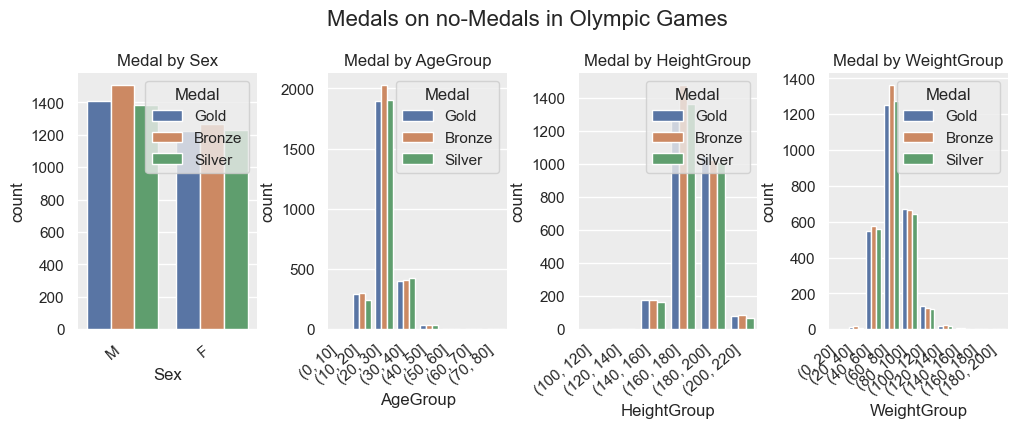

In [18] used 6.0 MiB RAM in 0.84s (system mean cpu 4%, single max cpu 100%), peaked 5.3 MiB above final usage, current RAM usage now 290.5 MiB


In [18]:
# EDA avec Seaborn
import seaborn as sns
sns.set(style="dark")

figure = plt.figure(figsize = (12, 8))
figure.suptitle('Medals on no-Medals in Olympic Games', fontsize=16)
plt.rc('axes', facecolor='#ececec', edgecolor='none', axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')
# Add spacing between subplots
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=0.5, wspace=0.4)


for i, col in enumerate(attrs):
    plt.subplot(2, 4, i+1)
    plt.xticks(rotation=40, horizontalalignment='right')
    sns.countplot(x=col, hue='Medal', data=df).set_title('Medal by '+col)

plt.show()

In [19]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,AgeGroup,WeightGroup,HeightGroup
1,A Lamusi,M,23.0,170.0,60.000000,China,CHN,2012 Summer,2012,1,London,Judo,Judo Men's Extra-Lightweight,NaN,"(20, 30]","(40, 60]","(160, 180]"
79,Ragnhild Margrethe Aamodt,F,27.0,163.0,61.723618,Norway,NOR,2008 Summer,2008,1,Beijing,Handball,Handball Women's Handball,Gold,"(20, 30]","(60, 80]","(160, 180]"
80,Andreea Aanei,F,22.0,170.0,125.000000,Romania,ROU,2016 Summer,2016,1,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,"(20, 30]","(120, 140]","(160, 180]"
82,Fritz Aanes,M,26.0,187.0,89.000000,Norway,NOR,2004 Summer,2004,1,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,"(20, 30]","(80, 100]","(180, 200]"
98,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.000000,France,FRA,2012 Summer,2012,1,London,Athletics,"Athletics Men's 1,500 metres",NaN,"(20, 30]","(60, 80]","(180, 200]"


In [19] used 0.1 MiB RAM in 0.12s (system mean cpu 3%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 290.7 MiB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,53653.0,25.886023,5.630824,12.0,22.0,25.0,29.0,71.0
Height,53653.0,176.129421,11.434809,133.0,168.0,176.0,184.0,226.0
Weight,53653.0,71.252891,15.784395,28.0,60.0,70.0,80.0,214.0
Year,53653.0,2010.001976,4.492436,2004.0,2004.0,2008.0,2016.0,2016.0
Season,53653.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [20] used 0.8 MiB RAM in 0.12s (system mean cpu 4%, single max cpu 100%), peaked 1.7 MiB above final usage, current RAM usage now 291.5 MiB


In [21]:
print(df.dtypes)

Name             object
Sex              object
Age             float64
Height          float64
Weight          float64
Team             object
NOC              object
Games            object
Year              int64
Season            int32
City             object
Sport            object
Event            object
Medal            object
AgeGroup       category
WeightGroup    category
HeightGroup    category
dtype: object
In [21] used 0.0 MiB RAM in 0.10s (system mean cpu 1%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 291.5 MiB


#### Number of events in each sport over years [Heatmap]

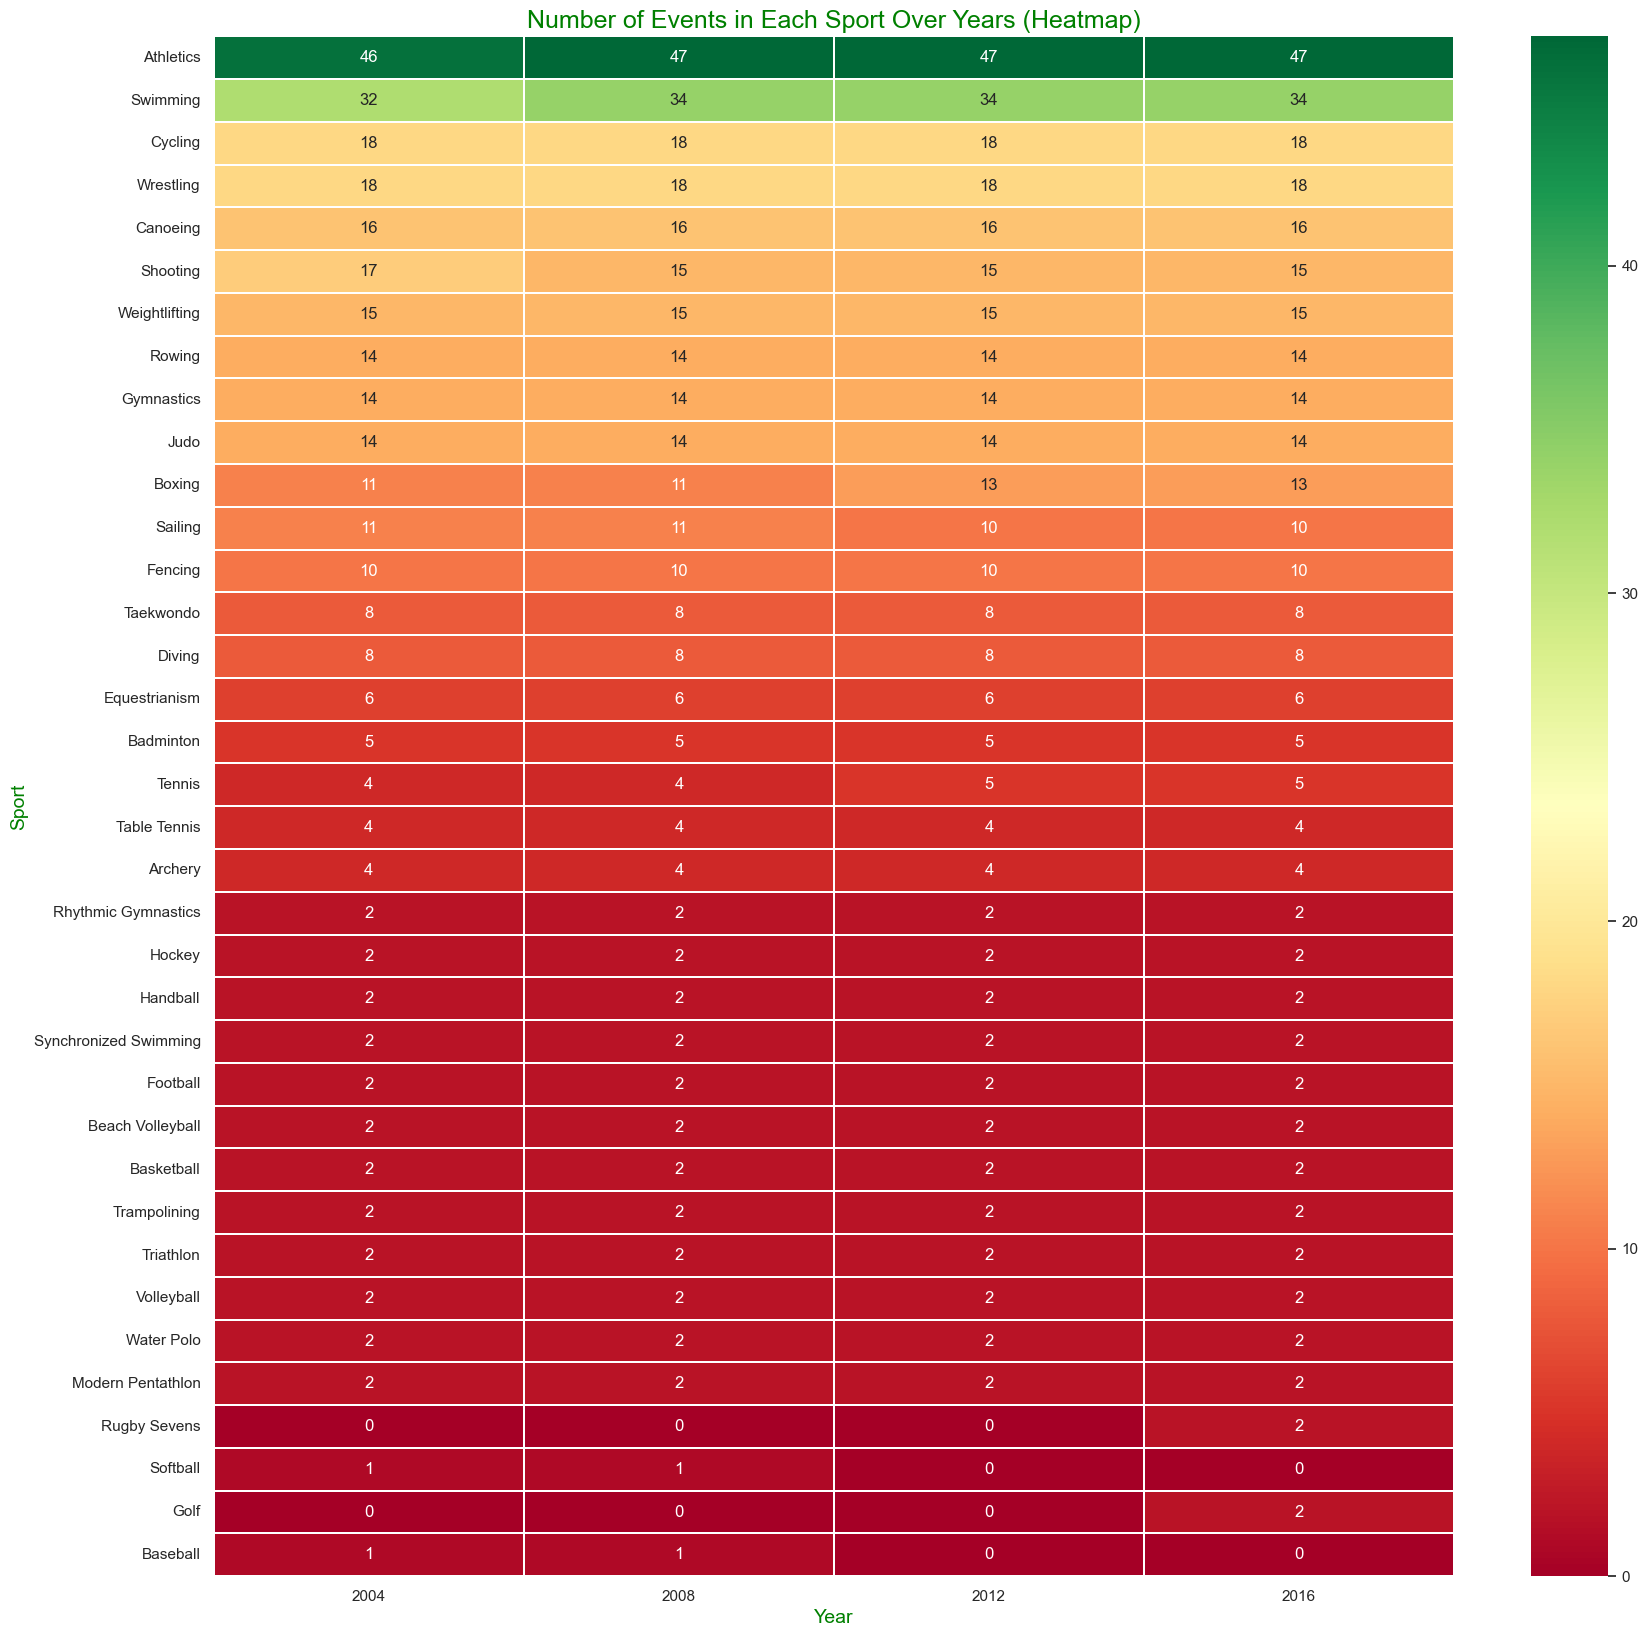

In [22] used 13.8 MiB RAM in 0.71s (system mean cpu 2%, single max cpu 100%), peaked 25.6 MiB above final usage, current RAM usage now 305.3 MiB


In [22]:
sport_year = df.pivot_table(index='Sport', columns='Year', values='Event', aggfunc=lambda x: len(x.unique()))
sport_year.fillna(0, inplace=True)
sport_year = sport_year.reindex(sport_year.sum(axis=1).sort_values(ascending=False).index)

# Affichage de la heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(sport_year, annot=True, linewidths=0.05, cmap="RdYlGn")
plt.xlabel('Year', size=14, color="green")
plt.ylabel('Sport', size=14, color="green")
plt.title('Number of Events in Each Sport Over Years (Heatmap)', size=18, color="green")
plt.show()


#### Count plot for medals in summer olympics

Text(0.5, 1.0, 'Count plot for medals in summer olympics')

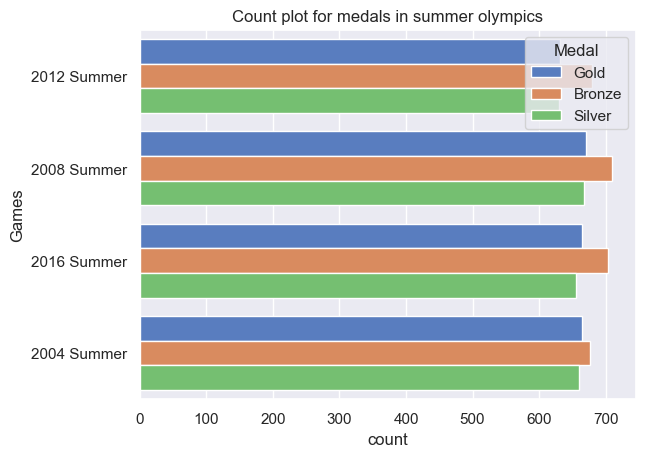

In [23] used 1.3 MiB RAM in 0.33s (system mean cpu 2%, single max cpu 100%), peaked 1.2 MiB above final usage, current RAM usage now 306.6 MiB


In [23]:
#Most Medals in Summer Olympics
data = df.groupby(['Event','Games'])['Medal'].value_counts()
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='Games', hue='Medal', data=df).set_title('Count plot for medals in summer olympics')

<Axes: xlabel='Games', ylabel='count'>

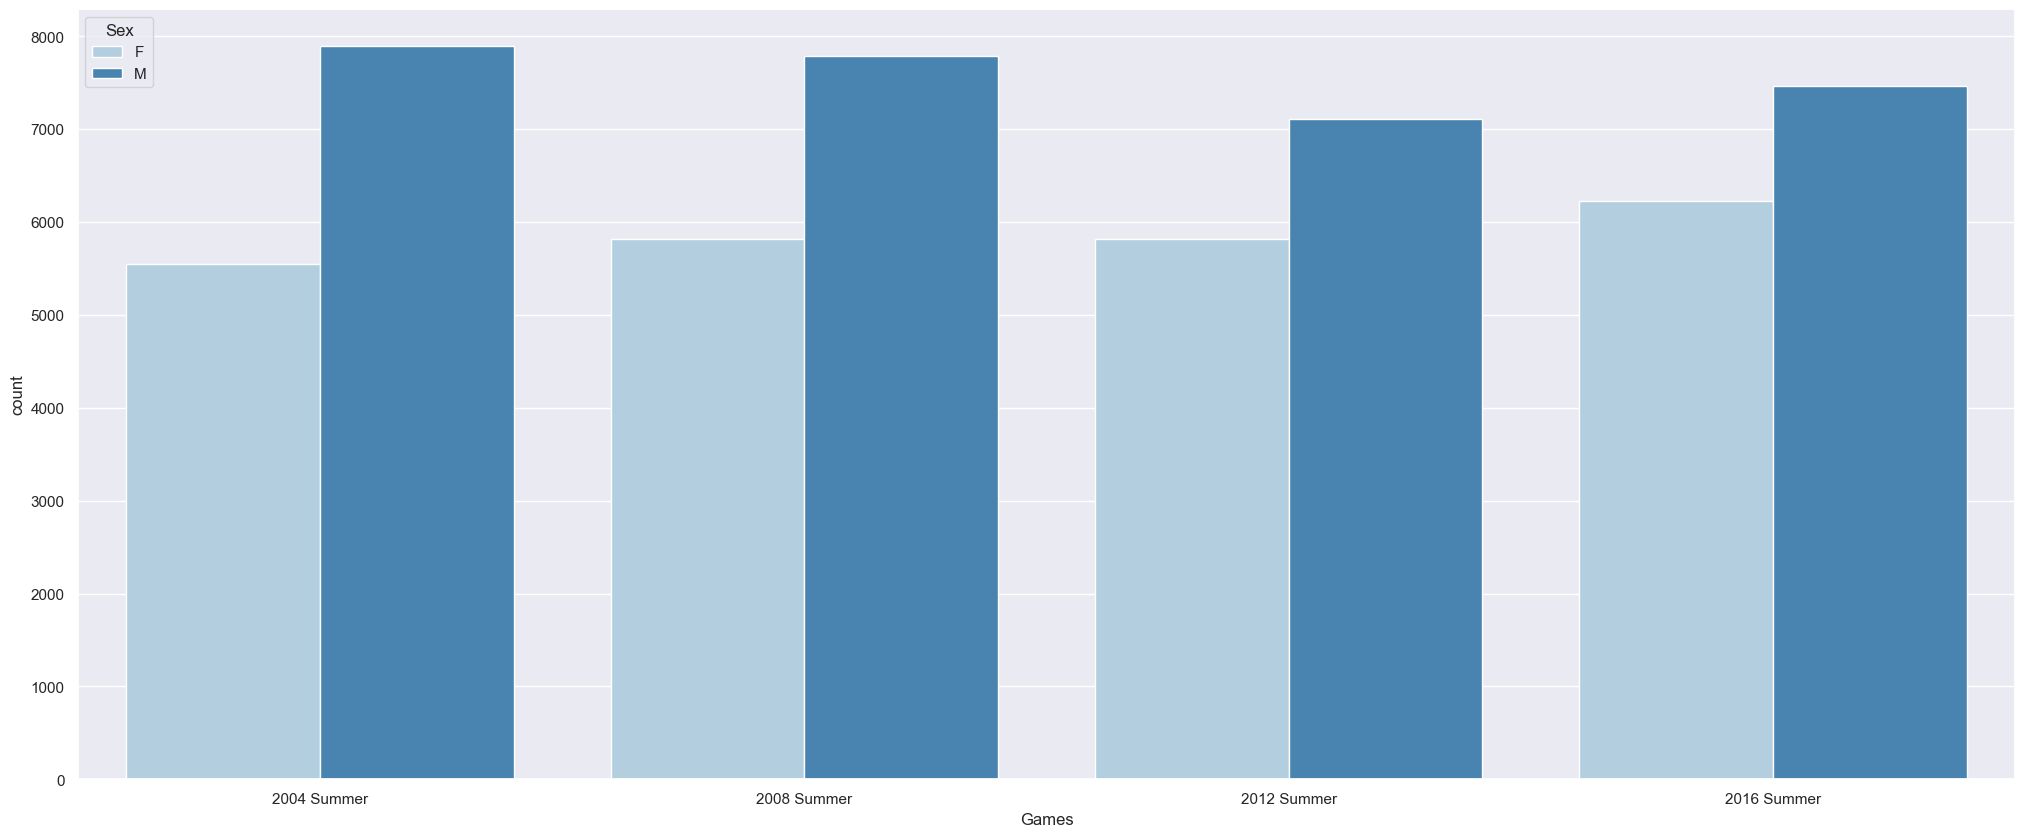

In [24] used 6.7 MiB RAM in 0.32s (system mean cpu 2%, single max cpu 100%), peaked 16.0 MiB above final usage, current RAM usage now 313.3 MiB


In [24]:
df_sports = df.groupby(["Games","Sex"])["Sport"].count().reset_index().rename(columns={"Sport":"count"})
plt.figure(figsize=(25,10))
sns.barplot(x="Games", y = "count", hue = "Sex", data = df_sports, palette = "Blues" )

In [25]:
# # RUSSIA
# df.loc[(df['Team'] == 'Soviet Union') & (df['NOC'] == 'URS'), ['Team', 'NOC']] = ['Russia', 'RUS'] # URSS période 1952-1988
df.loc[(df['Team'] == 'ROC') & (df['NOC'] == 'ROC'), ['Team', 'NOC']] = ['Germany', 'RUS'] # JO 2020

# # GERMANY
# df.loc[(df['Team'] == 'East Germany') & (df['NOC'] == 'GDR'), ['Team', 'NOC']] = ['Germany', 'GER']

# CHINA
df.loc[df['Team'] == "People's Republic of China", ['Team', 'NOC']] = ['China', 'CHN']

# UNITED STATES
df.loc[df['Team'] == "United States of America", ['Team', 'NOC']] = ['United States', 'USA']

In [25] used 0.0 MiB RAM in 0.12s (system mean cpu 2%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 313.3 MiB


#### Distribution of Age of Gold Medalists

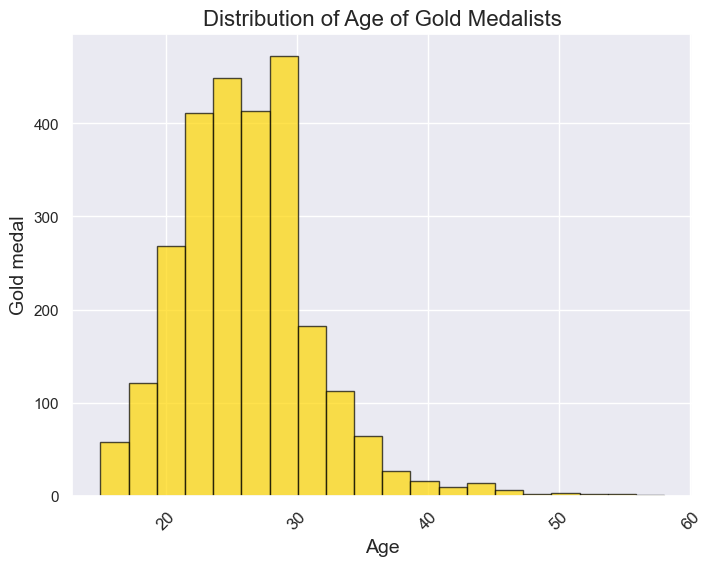

In [26] used 1.8 MiB RAM in 0.25s (system mean cpu 2%, single max cpu 100%), peaked 1.8 MiB above final usage, current RAM usage now 315.1 MiB


In [26]:
gold_medals = df[df['Medal'] == 'Gold']

plt.figure(figsize=(8, 6))  
plt.hist(gold_medals['Age'], bins=20, color='gold', edgecolor='black', alpha=0.7)  

plt.title('Distribution of Age of Gold Medalists', fontsize=16)  
plt.xlabel('Age', fontsize=14)  
plt.ylabel('Gold medal', fontsize=14)  
plt.xticks(rotation=45, fontsize=12)  


plt.show()
#


#### Evolution du nombres de médailles gagnés par les favoris

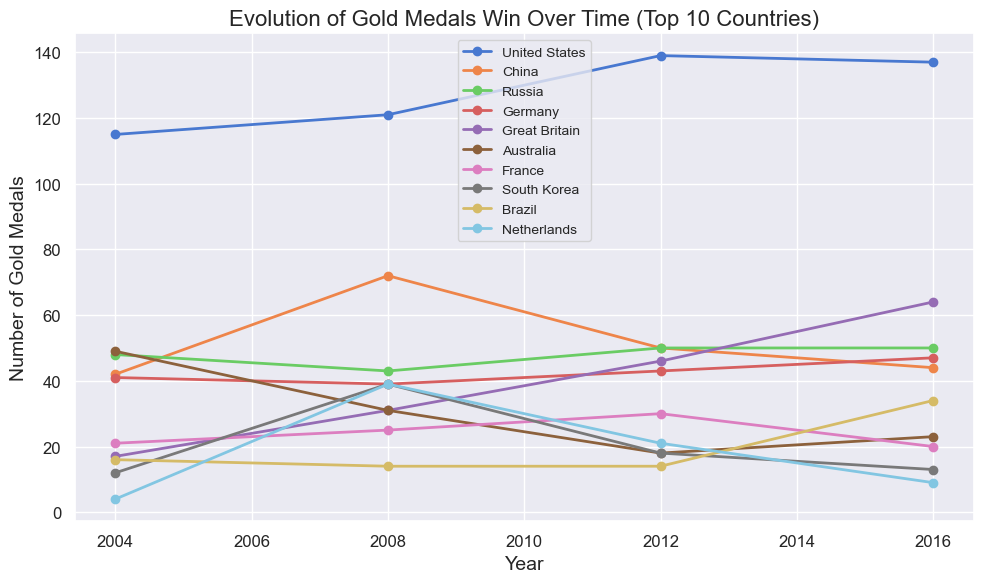

In [27] used 2.8 MiB RAM in 0.37s (system mean cpu 1%, single max cpu 100%), peaked 4.5 MiB above final usage, current RAM usage now 317.9 MiB


In [27]:
import matplotlib.pyplot as plt

# Filter the data to include only gold medal winners
gold_medals = df[df['Medal'] == 'Gold']

# Group the data by year and count the number of gold medals won each year for each country
gold_medals_by_year_and_country = gold_medals.groupby(['Year', 'Team'])['Medal'].count().unstack()

# Select the top 10 countries with the most gold medals overall
top_10_countries = gold_medals.groupby('Team')['Medal'].count().nlargest(10).index

# Plotting the curve for the evolution of gold medals over time for the top 10 countries
plt.figure(figsize=(10, 6))  # Taille de la figure

for country in top_10_countries:
    plt.plot(gold_medals_by_year_and_country.index, gold_medals_by_year_and_country[country], 
             marker='o', markersize=6, linewidth=2, label=country)  # Courbe pour chaque pays avec la légende

plt.title('Evolution of Gold Medals Win Over Time (Top 10 Countries)', fontsize=16)  # Titre
plt.xlabel('Year', fontsize=14)  # Étiquette de l'axe x
plt.ylabel('Number of Gold Medals', fontsize=14)  # Étiquette de l'axe y
plt.xticks(fontsize=12)  # Taille de la police des étiquettes de l'axe x
plt.yticks(fontsize=12)  # Taille de la police des étiquettes de l'axe y

plt.grid(True)  # Afficher la grille
plt.legend(fontsize=10)  # Ajouter la légende
plt.tight_layout()  # Ajuster la mise en page
plt.show()


#### Evolution of Gold Medals per Athlete Over Time

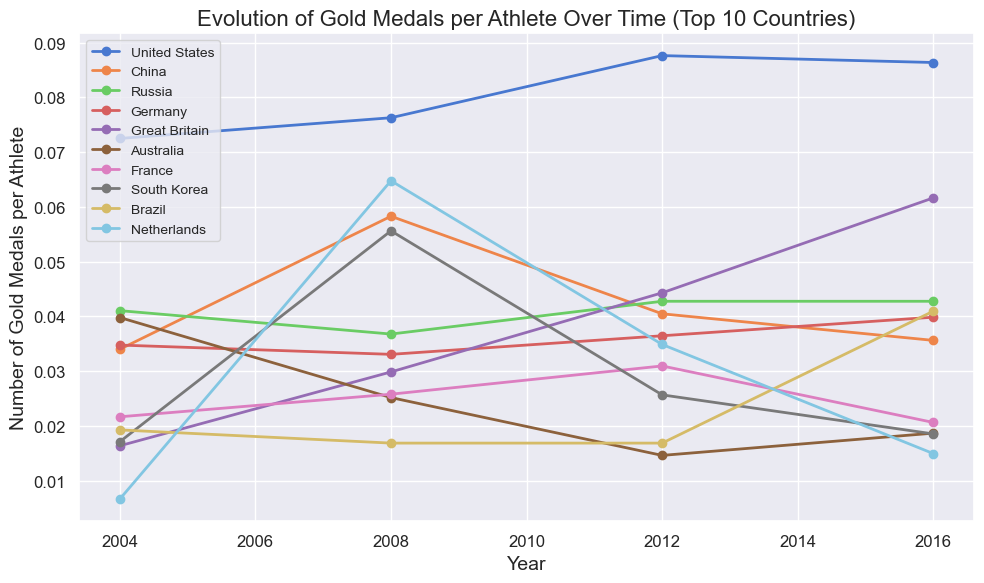

In [28] used 1.3 MiB RAM in 0.41s (system mean cpu 2%, single max cpu 100%), peaked 4.5 MiB above final usage, current RAM usage now 319.2 MiB


In [28]:
import matplotlib.pyplot as plt

# Calculate the total number of athletes per country
total_athletes_per_country = df.groupby('Team')['Name'].nunique()

# Filter the data to include only gold medal winners
gold_medals = df[df['Medal'] == 'Gold']

# Group the data by year and count the number of gold medals won each year for each country
gold_medals_by_year_and_country = gold_medals.groupby(['Year', 'Team'])['Medal'].count().unstack()

# Calculate the number of gold medals per athlete for each country and each year
gold_medals_per_athlete = gold_medals_by_year_and_country.div(total_athletes_per_country, axis=1)

# Select the top 10 countries with the most gold medals overall
top_10_countries = gold_medals.groupby('Team')['Medal'].count().nlargest(10).index

# Plotting the curve for the evolution of gold medals per athlete over time for the top 10 countries
plt.figure(figsize=(10, 6))  # Taille de la figure

for country in top_10_countries:
    plt.plot(gold_medals_per_athlete.index, gold_medals_per_athlete[country], 
             marker='o', markersize=6, linewidth=2, label=country)  # Courbe pour chaque pays avec la légende

plt.title('Evolution of Gold Medals per Athlete Over Time (Top 10 Countries)', fontsize=16)  # Titre
plt.xlabel('Year', fontsize=14)  # Étiquette de l'axe x
plt.ylabel('Number of Gold Medals per Athlete', fontsize=14)  # Étiquette de l'axe y
plt.xticks(fontsize=12)  # Taille de la police des étiquettes de l'axe x
plt.yticks(fontsize=12)  # Taille de la police des étiquettes de l'axe y

plt.grid(True)  # Afficher la grille
plt.legend(fontsize=10)  # Ajouter la légende
plt.tight_layout()  # Ajuster la mise en page
plt.show()


#### Total Number of Medals Won by Country and Medal Type

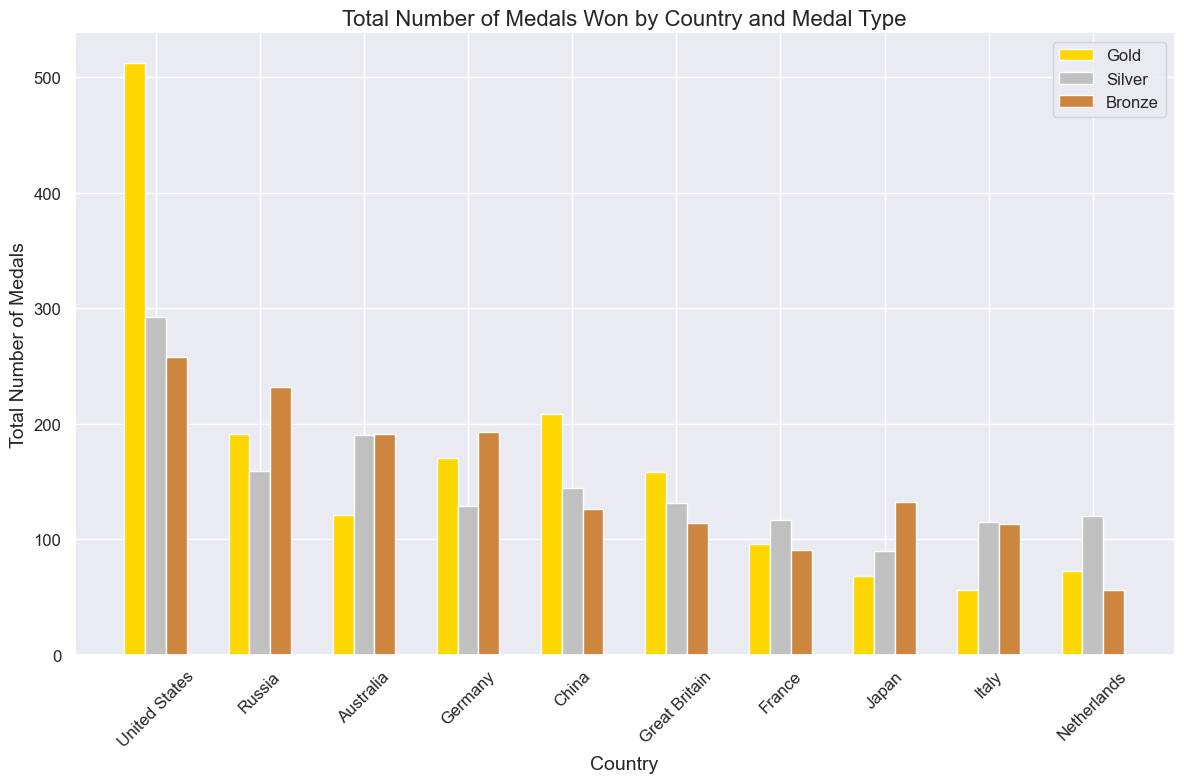

In [29] used 4.6 MiB RAM in 0.35s (system mean cpu 3%, single max cpu 100%), peaked 7.2 MiB above final usage, current RAM usage now 323.8 MiB


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by country and count the total number of medals won by each country and each type of medal
medals_by_country = df.groupby(['Team', 'Medal']).size().unstack(fill_value=0)

# Select the top 10 countries with the most total medals
top_10_countries = medals_by_country.sum(axis=1).nlargest(10).index

# Select the medal types
medal_types = ['Gold', 'Silver', 'Bronze']

# Set the position of each bar on the x-axis
x = np.arange(len(top_10_countries))

# Set the width of the bars
width = 0.2

# Assign colors to each medal type
colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru'}

# Plotting the grouped bar graph
plt.figure(figsize=(12, 8))  # Taille de la figure

for i, medal in enumerate(medal_types):
    plt.bar(x - width + i * width, medals_by_country.loc[top_10_countries, medal], 
            width=width, label=medal, color=colors[medal])

plt.title('Total Number of Medals Won by Country and Medal Type', fontsize=16)  # Titre
plt.xlabel('Country', fontsize=14)  # Étiquette de l'axe x
plt.ylabel('Total Number of Medals', fontsize=14)  # Étiquette de l'axe y
plt.xticks(ticks=x, labels=top_10_countries, rotation=45, fontsize=12)  # Étiquettes de l'axe x
plt.yticks(fontsize=12)  # Taille de la police des étiquettes de l'axe y

# Supprimer les bordures de la figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend(fontsize=12)  # Ajouter la légende
plt.tight_layout()  # Ajuster la mise en page
plt.show()


#### Strongest Evolution in Medals Won by Team

In [30]:
# Filter the data to include only Summer Olympic Games between 2010 and 2020
summer_games = df[(df['Season'] == 'Summer') & (df['Year'] >= 2008) & (df['Year'] <= 2020)]

# Group the data by team and year, and calculate the total number of medals won by each team in each year
medals_by_year = summer_games.groupby(['Team', 'Year'])['Medal'].count().unstack()

# Calculate the difference in the number of medals won by each team between the first year and the last year
medal_difference = medals_by_year.iloc[:, -1] - medals_by_year.iloc[:, 0]

# Sort the teams based on the difference in the number of medals won in descending order
sorted_teams = medal_difference.sort_values(ascending=False)

# Select the top 5 teams with the largest increase in medals won
top_5_teams = sorted_teams.index[:10]

# Create a line chart showing the number of medals won by the top 5 teams in each year
plt.figure(figsize=(12, 6))
for team in top_5_teams:
    plt.plot(medals_by_year.loc[team], label=team)
plt.title('Strongest Evolution in Medals Won by Team', fontsize=18, color='#003f5c')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='#003f5c')
plt.ylabel('Number of Medals', fontsize=14, fontweight='bold', color='#003f5c')
plt.xticks(fontsize=12, color='#003f5c')
plt.yticks(fontsize=12, color='#003f5c')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='#003f5c')
plt.legend()
plt.tight_layout()
plt.show()


IndexError: single positional indexer is out-of-bounds

In [30] used 6.9 MiB RAM in 0.54s (system mean cpu 2%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 330.7 MiB


#### Number of Sports Over Time

In [ ]:
summer_sports_per_year = df[df['Season'] == 'Summer'].groupby('Year')['Sport'].nunique()

plt.figure(figsize=(12, 6))
plt.plot(summer_sports_per_year.index, summer_sports_per_year.values, color='#003f5c')
plt.title('Number of Sports Over Time (Summer)', fontsize=18, color='#003f5c')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='#003f5c')
plt.ylabel('Number of Sports', fontsize=14, fontweight='bold', color='#003f5c')
plt.xticks(fontsize=12, color='#003f5c')
plt.yticks(fontsize=12, color='#003f5c')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='#003f5c')
plt.tight_layout()
plt.show()

#### Last sport that apperead with most medals

In [ ]:
# Identifier les années où chaque sport est apparu pour la première fois
first_appearance = summer_games.groupby('Sport')['Year'].min()

# Sélectionner les 10 derniers sports apparus
latest_sports = first_appearance.sort_values(ascending=False).head(10)

# Filtrer les données pour inclure seulement les médailles des 10 derniers sports
latest_sports_medals = summer_games[summer_games['Sport'].isin(latest_sports.index)]

# Compter le nombre total de médailles par sport
medal_counts = latest_sports_medals.groupby('Sport')['Medal'].count().sort_values(ascending=False)

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
bar_plot = medal_counts.plot(kind='bar', color='skyblue')

# Ajouter l'année d'apparition à chaque barre
for i, v in enumerate(medal_counts):
    sport_name = medal_counts.index[i]
    year = first_appearance[sport_name]
    bar_plot.text(i, v + 0.2, str(year), ha='center')

plt.title('Nombre total de médailles parmi les 10 derniers sports apparus')
plt.xlabel('Sport')
plt.ylabel('Nombre total de médailles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Sports with the Most Medals

In [ ]:
top_10_sports = df.groupby('Sport')['Medal'].count().nlargest(10)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_10_sports.index, top_10_sports.values, color='#ffa600')
ax.set_title('Top 10 Sports with the Most Medals', color='#003f5c')
ax.set_xlabel('Sport', color='#003f5c')
ax.set_ylabel('Number of Medals', color='#003f5c')
ax.tick_params(axis='both', colors='#003f5c')
ax.grid(axis='y', linestyle='--', color='#003f5c')

for i, sport in enumerate(top_10_sports.index):
    ax.text(i, top_10_sports[sport] + 0.5, str(top_10_sports[sport]), color='black', ha='center')

plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_athletes['Athlete'] + ' - ' + top_10_athletes['Sport'], 
                top_10_athletes['Medal Count'], color='gold', edgecolor='black', alpha=0.7)

# Add the number of medals in the middle of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10)

plt.xlabel('Medal Count', fontsize=14)
plt.ylabel('Athlete - Discipline', fontsize=14)  # Updated ylabel
plt.title('Top 10 Athletes with Most Medals', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the athlete with most medals on top
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:

# Filter the data to include only male and female athletes between 2000 and 2016
athletes_2000_2016 = df[(df['Year'] >= 2000) & (df['Year'] <= 2016)]

# Group the data by gender and year, and calculate the average height for each gender and year
average_height_by_gender_and_year_2000_2016 = athletes_2000_2016.groupby(['Sex', 'Year'])['Height'].mean()

# Create a line plot to visualize the variation of height over time between 2000 and 2016 for both male and female athletes
plt.figure(figsize=(10, 6))

# Plot the average height for male athletes
male_heights = average_height_by_gender_and_year_2000_2016['M']
plt.plot(male_heights.index, male_heights.values, color='blue', label='Male')

# Plot the average height for female athletes
female_heights = average_height_by_gender_and_year_2000_2016['F']
plt.plot(female_heights.index, female_heights.values, color='red', label='Female')

plt.title('Variation of Height for Male and Female Athletes over Time (2000-2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Height (cm)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.show()



# 3. Préparation des données

In [463]:
# Merge des dataframes 

df = pd.read_csv("data/athlete_events.csv")
df = df[(df['Year'] > 2000) & (df['Year'] <= 2016) & (df['Season'] == 'Summer')]

region_df = pd.read_csv("data/noc_regions.csv")
dictionary = pd.read_csv("data/dictionary.csv")

In [463] used -28.8 MiB RAM in 0.49s (system mean cpu 12%, single max cpu 100%), peaked 38.3 MiB above final usage, current RAM usage now 955.4 MiB


In [464]:
df.shape

(53653, 14)

In [464] used 0.0 MiB RAM in 0.10s (system mean cpu 5%, single max cpu 75%), peaked 0.0 MiB above final usage, current RAM usage now 955.4 MiB


### Normalisation des noms des pays

In [465]:
# # RUSSIA
# df.loc[(df['Team'] == 'Soviet Union') & (df['NOC'] == 'URS'), ['Team', 'NOC']] = ['Russia', 'RUS'] # URSS période 1952-1988
df.loc[(df['Team'] == 'ROC') & (df['NOC'] == 'ROC'), ['Team', 'NOC']] = ['Germany', 'RUS'] # JO 2020

# # GERMANY
# df.loc[(df['Team'] == 'East Germany') & (df['NOC'] == 'GDR'), ['Team', 'NOC']] = ['Germany', 'GER']

# CHINA
df.loc[df['Team'] == "People's Republic of China", ['Team', 'NOC']] = ['China', 'CHN']

# UNITED STATES
df.loc[df['Team'] == "United States of America", ['Team', 'NOC']] = ['United States', 'USA']

In [465] used 0.1 MiB RAM in 0.11s (system mean cpu 3%, single max cpu 57%), peaked 0.0 MiB above final usage, current RAM usage now 955.5 MiB


In [466]:
# Fusion de la colonne 'Team' du DataFrame df avec la colonne 'Country' du DataFrame dictionary_df
merged_df = pd.merge(df, dictionary, left_on='Team', right_on='Country', how='left') # how = 'left' pour conserver toutes les lignes de df

# Fusion du DataFrame merged_df avec le DataFrame region_df en se basant sur la colonne 'NOC' dans merged_df et dans region_df
final_merged_df = pd.merge(merged_df, region_df, on='NOC', how='left')

# Affectation du résultat final à la variable df
df = final_merged_df
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Code,Population,GDP per Capita,region,notes
0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,CHN,1.371220e+09,8027.683810,China,NaN
1,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NOR,5.195921e+06,74400.369777,Norway,NaN
2,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,ROM,1.983239e+07,8972.922518,Romania,NaN
3,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,Norway,NOR,5.195921e+06,74400.369777,Norway,NaN
4,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN,France,FRA,6.680838e+07,36205.568102,France,NaN


In [466] used 4.2 MiB RAM in 0.13s (system mean cpu 5%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 959.7 MiB


In [467]:
df.shape # 6 colonnes supplémentaires ont été ajoutées

(53653, 20)

In [467] used 0.0 MiB RAM in 0.10s (system mean cpu 1%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 959.8 MiB


In [468]:
import pandas as pd

# Votre DataFrame df doit être déjà défini

# Votre dictionnaire de correspondance
country_mapping = {
    'Indonesia-1': 'Indonesia',
    'Nigeria-2': 'Nigeria',
    'Brazil-1': 'Brazil',
    'Spain-2': 'Spain',
    'Brazil-2': 'Brazil',
    'Russia-2': 'Russia',
    'Japan-1': 'Japan',
    'Australia-2': 'Australia',
    'Greece-1': 'Greece',
    'Greece-2': 'Greece',
    'Japan-2': 'Japan',
    'Sweden-2': 'Sweden',
    'Belarus-1': 'Belarus',
    'Germany-2': 'Germany',
    'Great Britain-1': 'United Kingdom',
    'United States-1': 'United States',
    'United States-2': 'United States',
    'Canada-1': 'Canada',
    'Spain-1': 'Spain',
    'Australia-1': 'Australia',
    'Germany-1': 'Germany',
    'Romania-1': 'Romania',
    'Switzerland-2': 'Switzerland',
    'Czech Republic-2': 'Czech Republic',
    'France-2': 'France',
    'Czech Republic-1': 'Czech Republic',
    'Canada-2': 'Canada',
    'Austria-1': 'Austria',
    'India-1': 'India',
    'Sweden-1': 'Sweden',
    'Great Britain-2': 'United Kingdom',
    'Netherlands-2': 'Netherlands',
    'Ukraine-2': 'Ukraine',
    'Italy-1': 'Italy',
    'Netherlands-1': 'Netherlands',
    'Indonesia-2': 'Indonesia',
    'China-2': 'China',
    'China-1': 'China',
    'Argentina-1': 'Argentina',
    'Argentina-2': 'Argentina',
    'Italy-2': 'Italy',
    'Malaysia-1': 'Malaysia',
    'South Korea-2': 'South Korea',
    'Hong Kong-1': 'Hong Kong',
    'Switzerland-1': 'Switzerland',
    'Malaysia-2': 'Malaysia',
    'Cuba-1': 'Cuba',
    'Hungary-1': 'Hungary',
    'France-1': 'France',
    'Poland-2': 'Poland',
    'Austria-2': 'Austria',
    'Serbia-2': 'Serbia',
    'Nigeria-1': 'Nigeria',
    'Denmark-2': 'Denmark',
    'Cuba-2': 'Cuba',
    'Poland-1': 'Poland',
    'Norway-2': 'Norway',
    'Belarus-2': 'Belarus',
    'Norway-1': 'Norway',
    'Slovakia-2': 'Slovakia',
    'Denmark-1': 'Denmark',
    'South Korea-1': 'South Korea',
    'Singapore-2': 'Singapore',
    'Russia-1': 'Russia',
    'Hong Kong-2': 'Hong Kong',
    'Ukraine-1': 'Ukraine',
    'Slovenia-1': 'Slovenia',
    'Slovakia-1': 'Slovakia',
    'Hungary-2': 'Hungary',
    'Slovenia-2': 'Slovenia',
    'Romania-2': 'Romania',
    'Thailand-1': 'Thailand',
    'India-2': 'India',
    'Thailand-2': 'Thailand',
    'Latvia-1': 'Latvia',
    'Latvia-2': 'Latvia',
    'Singapore-1': 'Singapore',
    'Serbia-1': 'Serbia',
    'China-3': 'China'
}

# Appliquer la normalisation sur la colonne 'Team'
df['Team'] = df['Team'].map(lambda x: country_mapping.get(x, x))

# Afficher le DataFrame mis à jour
print(df)


                                     Name Sex   Age  Height  Weight  \
0                                A Lamusi   M  23.0   170.0    60.0   
1               Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN   
2                           Andreea Aanei   F  22.0   170.0   125.0   
3                             Fritz Aanes   M  26.0   187.0    89.0   
4      Jamale (Djamel-) Aarrass (Ahrass-)   M  30.0   187.0    76.0   
...                                   ...  ..   ...     ...     ...   
53648                   Stavroula Zygouri   F  36.0   171.0    63.0   
53649           Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   
53650            Fernando scar Zylberberg   M  27.0   168.0    76.0   
53651        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
53652              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

            Team  NOC        Games  Year  Season            City  \
0          China  CHN  2012 Summer  2012  Summer          London   
1         N

### Avoir la colonne du Pays hôte (pas uniquement la ville)

In [469]:
worldcities = pd.read_csv("data/worldcities.csv", delimiter=';')
worldcities.head()

,city,country
0,Tokyo,Japan
1,New York,United States
2,Mexico City,Mexico
3,Mumbai,India
4,São Paulo,Brazil


In [469] used 1.7 MiB RAM in 0.11s (system mean cpu 4%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 961.5 MiB


In [470]:
# Faire la fusion initiale
df = pd.merge(df, worldcities, left_on='City', right_on='city', how='left')

# Appliquer la condition pour corriger le pays pour la ville de "London"
df.loc[df['City'] == 'London', 'country'] = 'United Kingdom'

# Renommer la colonne 'country' en 'CountryHost'
df.rename(columns={'country': 'CountryHost'}, inplace=True)

In [470] used 17.2 MiB RAM in 0.14s (system mean cpu 1%, single max cpu 50%), peaked 5.3 MiB above final usage, current RAM usage now 978.7 MiB


In [471]:
df.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,...,Event,Medal,Country,Code,Population,GDP per Capita,region,notes,city,CountryHost
0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,...,Judo Men's Extra-Lightweight,NaN,China,CHN,1.371220e+09,8027.683810,China,NaN,London,United Kingdom
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,...,Judo Men's Extra-Lightweight,NaN,China,CHN,1.371220e+09,8027.683810,China,NaN,London,United Kingdom
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,...,Judo Men's Extra-Lightweight,NaN,China,CHN,1.371220e+09,8027.683810,China,NaN,London,United Kingdom
3,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,...,Judo Men's Extra-Lightweight,NaN,China,CHN,1.371220e+09,8027.683810,China,NaN,London,United Kingdom
4,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,...,Handball Women's Handball,Gold,Norway,NOR,5.195921e+06,74400.369777,Norway,NaN,Beijing,China


In [471] used 0.0 MiB RAM in 0.11s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 978.7 MiB


## 3.2. Nettoyer les données

### 3.2.1. Données manquantes

In [472]:
# Vérification des valeurs NULL 
df.isnull().sum() 

Name                  0
Sex                   0
Age                   2
Height             1035
Weight             1859
Team                  0
NOC                   0
Games                 0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal             78577
Country            9648
Code               9648
Population         9776
GDP per Capita    12105
region              262
notes             91505
city              13443
CountryHost       13443
dtype: int64

In [472] used 0.3 MiB RAM in 0.13s (system mean cpu 5%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 978.9 MiB


In [473]:
df.drop(columns=['Games','region', 'notes', 'city', 'Country', 'Code'], inplace=True)

In [473] used 9.2 MiB RAM in 0.11s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 988.2 MiB


In [474]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Population,GDP per Capita,CountryHost
0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1.371220e+09,8027.683810,United Kingdom
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1.371220e+09,8027.683810,United Kingdom
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1.371220e+09,8027.683810,United Kingdom
3,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1.371220e+09,8027.683810,United Kingdom
4,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,5.195921e+06,74400.369777,China


In [474] used 0.0 MiB RAM in 0.11s (system mean cpu 3%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 988.2 MiB


#### Traitement des valeurs nulles


In [475]:
categorical_vars = df.select_dtypes(include='object').columns
print(categorical_vars)

numerical_vars = df.select_dtypes(include='number').columns
print(numerical_vars)


Index(['Name', 'Sex', 'Team', 'NOC', 'Season', 'City', 'Sport', 'Event',
       'Medal', 'CountryHost'],
      dtype='object')
Index(['Age', 'Height', 'Weight', 'Year', 'Population', 'GDP per Capita'], dtype='object')
In [475] used 0.5 MiB RAM in 0.12s (system mean cpu 3%, single max cpu 100%), peaked 12.7 MiB above final usage, current RAM usage now 988.7 MiB


Traitement Age

In [476]:
# On va utiliser un imputer 
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(df[['Age']])
df[['Age']] = imputerKNN.transform(df[['Age']])

In [476] used 1.0 MiB RAM in 0.11s (system mean cpu 3%, single max cpu 100%), peaked 2.8 MiB above final usage, current RAM usage now 989.6 MiB


KNN sur toutes variables numérical

In [477]:
# from sklearn.impute import KNNImputer

# # Sélectionner les colonnes numériques avec des valeurs manquantes
# numeric_columns = ['Age', 'Height', 'Weight', 'Year', 'Population', 'GDP per Capita']

# # Créer un imputer KNN avec un nombre de voisins à considérer (k)
# imputer = KNNImputer(n_neighbors=5)

# # Imputer les valeurs manquantes
# df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [477] used 0.0 MiB RAM in 0.10s (system mean cpu 1%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 989.6 MiB


Traitement Weight et Height

In [478]:
# Calculer les moyennes de la taille et du poids par sexe
average_height = df.groupby('Sex')['Height'].mean()
average_weight = df.groupby('Sex')['Weight'].mean()

# Créer un DataFrame à partir des moyennes calculées
average_stats_df = pd.DataFrame({'Average Height': average_height, 'Average Weight': average_weight})
average_stats_df


,Average Height,Average Weight
Sex,,
F,169.552775,61.863665
M,181.449042,78.752125


In [478] used 0.0 MiB RAM in 0.11s (system mean cpu 3%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 989.6 MiB


SimpleImputer

In [479]:
from sklearn.impute import SimpleImputer

df_male = df[df['Sex'] == 'M']
df_female = df[df['Sex'] == 'F']
columns_to_impute = ['Height', 'Weight']

# Créer un imputer avec la stratégie 'mean' pour remplacer les valeurs nulles par la moyenne
imputer = SimpleImputer(strategy='mean')

df_male[columns_to_impute] = imputer.fit_transform(df_male[columns_to_impute])
df_female[columns_to_impute] = imputer.fit_transform(df_female[columns_to_impute])

df = pd.concat([df_male, df_female])

In [479] used 10.7 MiB RAM in 0.14s (system mean cpu 2%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1000.3 MiB


C:\Users\guill\AppData\Local\Temp\ipykernel_5200\3666216440.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male[columns_to_impute] = imputer.fit_transform(df_male[columns_to_impute])
C:\Users\guill\AppData\Local\Temp\ipykernel_5200\3666216440.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female[columns_to_impute] = imputer.fit_transform(df_female[columns_to_impute])


Comme au dessus mais avec KNNimputer

In [480]:
# from sklearn.impute import KNNImputer

# # Séparer les données en fonction du sexe
# df_male = df[df['Sex'] == 'M']
# df_female = df[df['Sex'] == 'F']
# columns_to_impute = ['Age', 'Height', 'Weight']

# # Créer un imputer KNN avec un nombre de voisins à considérer (k)
# imputer = KNNImputer(n_neighbors=5)

# # Imputer les valeurs manquantes pour les hommes
# df_male[columns_to_impute] = imputer.fit_transform(df_male[columns_to_impute])

# # Imputer les valeurs manquantes pour les femmes
# df_female[columns_to_impute] = imputer.fit_transform(df_female[columns_to_impute])

# # Fusionner les DataFrames pour obtenir le DataFrame complet
# df = pd.concat([df_male, df_female])


In [480] used -0.0 MiB RAM in 0.10s (system mean cpu 1%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1000.3 MiB


In [481]:
df[df['Name'] == 'Ragnhild Margrethe Aamodt']

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Population,GDP per Capita,CountryHost
4,Ragnhild Margrethe Aamodt,F,27.0,163.0,61.863665,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,5195921.0,74400.369777,China


In [481] used 0.0 MiB RAM in 0.11s (system mean cpu 2%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1000.3 MiB


In [482]:
df.isnull().sum()

Name                  0
Sex                   0
Age                   0
Height                0
Weight                0
Team                  0
NOC                   0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal             78577
Population         9776
GDP per Capita    12105
CountryHost       13443
dtype: int64

In [482] used 0.1 MiB RAM in 0.12s (system mean cpu 3%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1000.4 MiB


### 3.2.2. Valeurs atypiques (outliers)

Tracer, en un graphique, le boxplot des variables numériques : 

<Axes: >

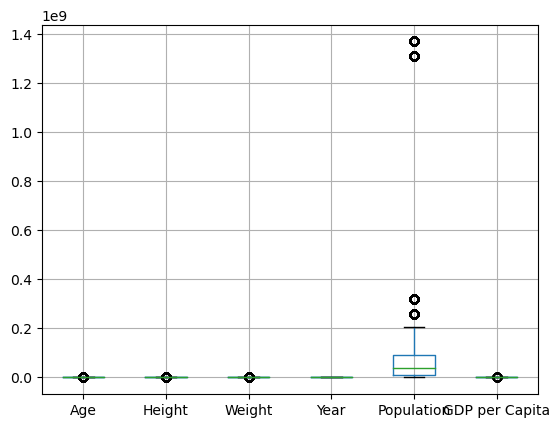

In [483] used 6.5 MiB RAM in 0.47s (system mean cpu 3%, single max cpu 100%), peaked 3.9 MiB above final usage, current RAM usage now 1006.9 MiB


In [483]:
df.boxplot()

<Axes: >

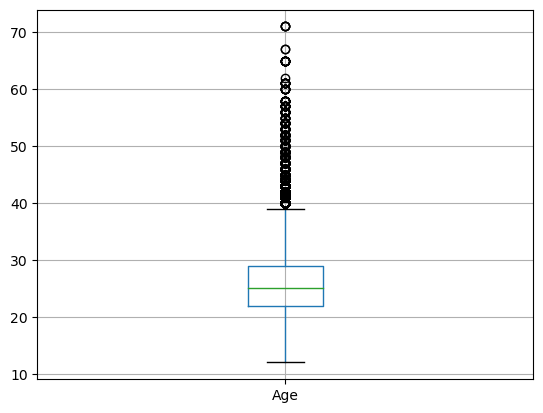

In [484] used 0.0 MiB RAM in 0.23s (system mean cpu 7%, single max cpu 100%), peaked 1.2 MiB above final usage, current RAM usage now 1006.9 MiB


In [484]:
#Tracer le boxplot de la variable Age : 
df.boxplot(column='Age',return_type='axes')

In [485]:
# On va modifier les plus hauts outliers identifiés pour Age par la valeur du 99ème quantile

cols = ['Age']
low = .05
high = .99 #Return values at the given quantile  0.99 (99% quantile)
quant_df =  df[cols].quantile([low, high])
print(quant_df)



       Age
0.05  18.0
0.99  44.0
In [485] used 0.0 MiB RAM in 0.11s (system mean cpu 2%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1006.9 MiB


In [486]:
higher = quant_df.loc[high,'Age']
higher

def func(x):
    if x >= higher:
        return higher
    else:
        return x

df['Age'] = df['Age'].apply(func)

In [486] used 0.0 MiB RAM in 0.11s (system mean cpu 2%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1006.9 MiB


In [487]:
#vérifier que pour les valeurs les plus hautes, on a bien modifié la valeur de fare par : 43 ans	

df[df['Age'].ge(quant_df.loc[high,'Age'])]

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Population,GDP per Capita,CountryHost
1309,Teruyoshi Akiyama,M,44.0,168.0,65.0,Japan,JPN,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN,126958472.0,32477.215145,Brazil
1393,Nasser Salih Nasser Abdullah Al-Attiya,M,44.0,178.0,82.0,Qatar,QAT,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Skeet,NaN,2235355.0,73653.394435,Brazil
1421,Dadallah Noor Mohamed Al-Bulushi,M,44.0,172.0,86.0,Oman,OMA,2008,Summer,Beijing,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",NaN,4490541.0,15550.676251,China
1431,Fehaid Al-Deehani,M,44.0,178.0,95.0,Kuwait,KUW,2012,Summer,London,Shooting,Shooting Men's Trap,Bronze,3892115.0,29300.575575,United Kingdom
1432,Fehaid Al-Deehani,M,44.0,178.0,95.0,Kuwait,KUW,2012,Summer,London,Shooting,Shooting Men's Trap,Bronze,3892115.0,29300.575575,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88058,Tinne Eva Caroline Wilhelmsson-Silfvn,F,44.0,167.0,60.0,Sweden,SWE,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Dressage, Team",NaN,9798871.0,50579.673649,Brazil
88828,Annette Mary Woodward,F,44.0,166.0,66.0,Australia,AUS,2004,Summer,Athina,Shooting,"Shooting Women's Sporting Pistol, 25 metres",NaN,23781169.0,56310.962993,NaN
89355,Mieko Yagi,F,44.0,160.0,53.0,Japan,JPN,2008,Summer,Beijing,Equestrianism,"Equestrianism Mixed Dressage, Individual",NaN,126958472.0,32477.215145,China
89356,Mieko Yagi,F,44.0,160.0,53.0,Dow Jones,JPN,2008,Summer,Beijing,Equestrianism,"Equestrianism Mixed Dressage, Team",NaN,NaN,NaN,China


In [487] used 0.0 MiB RAM in 0.12s (system mean cpu 1%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1006.9 MiB


In [488]:
# Export df = athlete_cleaned_final

df.to_csv('data/athlete_cleaned_final.csv', index=False) 


In [488] used -0.1 MiB RAM in 0.55s (system mean cpu 3%, single max cpu 100%), peaked 1.5 MiB above final usage, current RAM usage now 1006.9 MiB


In [489]:
df.isnull().sum()

Name                  0
Sex                   0
Age                   0
Height                0
Weight                0
Team                  0
NOC                   0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal             78577
Population         9776
GDP per Capita    12105
CountryHost       13443
dtype: int64

In [489] used 0.0 MiB RAM in 0.12s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 1006.9 MiB


In [490]:
df = df.dropna(subset=['Medal'])

In [490] used -6.0 MiB RAM in 0.11s (system mean cpu 7%, single max cpu 100%), peaked 6.0 MiB above final usage, current RAM usage now 1000.8 MiB


In [491]:
df.isnull().sum()

Name                 0
Sex                  0
Age                  0
Height               0
Weight               0
Team                 0
NOC                  0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal                0
Population        1600
GDP per Capita    1851
CountryHost       2001
dtype: int64

In [491] used 0.0 MiB RAM in 0.11s (system mean cpu 2%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1000.9 MiB


In [492]:
alternative_teams = df[df['Population'].isnull()]['Team'].unique()
print(alternative_teams)


['Indonesia' 'Great Britain' 'Individual Olympic Athletes' 'Brazil'
 'South Korea' 'Sweden' 'United Kingdom' 'Germany' 'France' 'Netherlands'
 'United States' 'China' 'Chinese Taipei' 'Serbia and Montenegro'
 'Puerto Rico' 'Denmark' 'Don Schufro' 'Switzerland' 'North Korea'
 'Hong Kong' 'Spain' 'Italy' 'Nadine' 'Latvia' 'Czech Republic' 'Eritrea'
 'Montenegro' 'Elvis Va' 'Japan' 'Clearwater' 'Kosovo' 'Bonaparte'
 'Russia' 'Sunrise' 'Salinero' 'Satchmo' 'Digby']
In [492] used -0.0 MiB RAM in 0.10s (system mean cpu 4%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1000.8 MiB


In [493]:
null_values_by_year = df[df['Population'].isnull()]['Year'].value_counts()
year_with_most_null_values = null_values_by_year.idxmax()
null_values_by_year


Year
2012    1000
2016     217
2008     212
2004     171
Name: count, dtype: int64

In [493] used 0.0 MiB RAM in 0.10s (system mean cpu 2%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1000.9 MiB


In [494]:
# je veux faire la moyenne de la population par pays et par année pour : 
# ['Indonesia' 'Great Britain' 'Individual Olympic Athletes' 'Brazil'
#  'South Korea' 'Sweden' 'United Kingdom' 'Germany' 'France' 'Netherlands'
#  'United States' 'China' 'Chinese Taipei' 'Serbia and Montenegro'
#  'Puerto Rico' 'Denmark' 'Don Schufro' 'Switzerland' 'North Korea'
#  'Hong Kong' 'Spain' 'Italy' 'Nadine' 'Latvia' 'Czech Republic' 'Eritrea'
#  'Montenegro' 'Elvis Va' 'Japan' 'Clearwater' 'Kosovo' 'Bonaparte'
#  'Russia' 'Sunrise' 'Salinero' 'Satchmo' 'Digby']

# si switzerland à dans la même année sur une autre ligne une population, je prends la population, sinon je prends la moyenne de la population de la suisse sur les autres années
# faire cela pour tout les pays mentionnés ci dessus 

In [494] used 0.0 MiB RAM in 0.10s (system mean cpu 4%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 1000.9 MiB
